In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# import variaous sublibraries from sklearn
from sklearn import  compose, pipeline, preprocessing, linear_model, tree, ensemble, model_selection, metrics, multiclass, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPClassifier

In [3]:
full_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
full_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
training, test = train_test_split(full_data, test_size=0.2, random_state=42)
y_test = test['DEATH_EVENT']
X_test =  test.drop('DEATH_EVENT', axis=1)

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 6 to 102
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
 12  DEATH_EVENT               239 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 26.1 KB


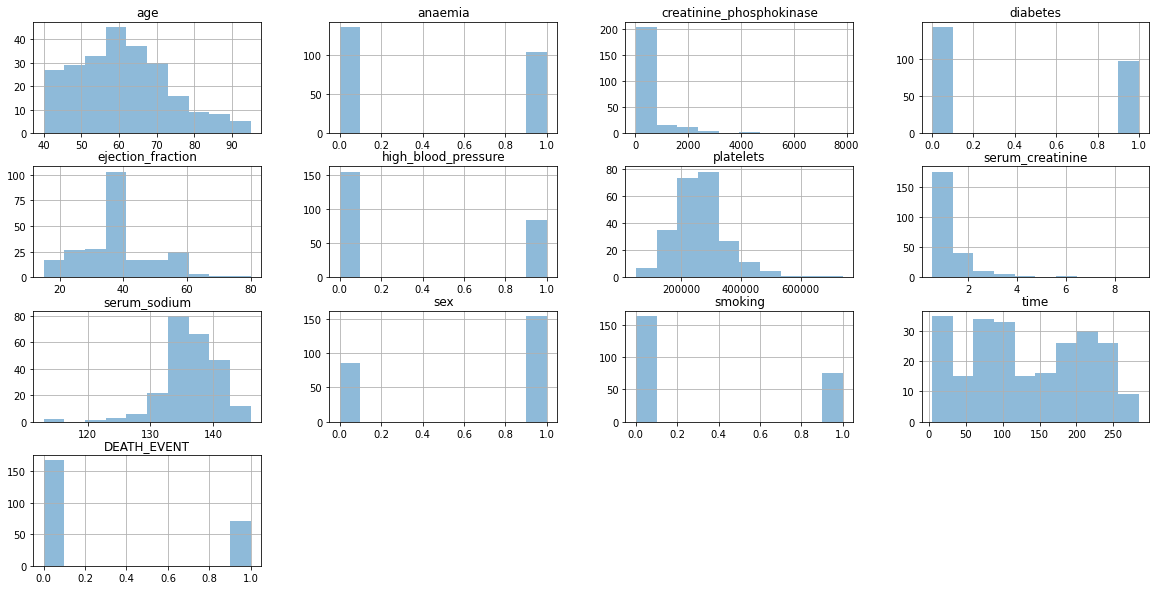

In [7]:
training.hist(alpha=0.5, figsize=(20, 10))
plt.show()

In [8]:
training.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
import sdv
print(sdv.version.public)

1.12.1


In [11]:
# Get the number of rows and columns
print('Number of rows:', training.shape[0])
print('Number of columns:', training.shape[1])

# Get the column names
print('Column names:', training.columns.tolist())

# Get the data types of each column
print('Data types:', training.dtypes)

# Get basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
print('Statistical summary:\n', training.describe())


Number of rows: 239
Number of columns: 13
Column names: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
Data types: age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
Statistical summary:
               age     anaemia  creatinine_phosphokinase    diabetes  \
count  239.000000  239.000000                239.000000  239.000000   
mean    61.059975    0.435146                577.083682    0.405858   
std     11.999013    0

In [28]:
#https://docs.sdv.dev/sdv/single-table-data/data-preparation/single-table-metadata-api
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

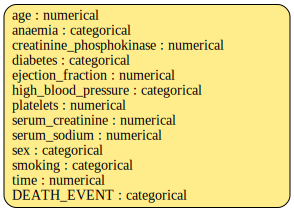

In [29]:
metadata.detect_from_dataframe(training)
#metadata.save_to_json(filepath='Heart Failure/metadata.json')
metadata.visualize()

In [14]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(training)
synthetic_data = synthesizer.sample(num_rows=239)

/home/pxk399/.local/lib/python3.10/site-packages/sdv/single_table/base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [30]:
synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': ['en_US'],
 'numerical_distributions': {},
 'default_distribution': 'beta'}

In [15]:
synthetic_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.554,1,391,0,21,1,304155.81,1.00,113,0,0,128,1
1,45.707,1,123,0,54,0,227854.55,1.13,113,1,0,21,1
2,52.533,0,455,0,70,0,260468.11,1.20,113,1,0,204,0
3,63.877,0,1300,1,39,0,325629.62,1.82,113,1,0,104,1
4,50.238,1,34,0,42,0,311539.76,1.81,113,1,1,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,64.024,0,424,1,41,0,260256.32,1.04,113,0,0,22,0
235,46.432,1,155,0,50,0,231544.31,1.63,113,1,0,148,0
236,63.836,0,83,0,67,0,357388.01,0.71,113,1,0,281,0
237,51.136,1,607,0,20,1,286546.87,0.58,113,1,0,206,1


In [16]:
# avoid some warnings - not a good style, but a small hack 

import warnings
warnings.filterwarnings(action='ignore')

In [17]:
training.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [18]:
synthetic_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [19]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=training,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 2160.04it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 615.27it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [21]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    training,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 1641.46it/s]|
Column Shapes Score: 85.48%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 84.22it/s]|
Column Pair Trends Score: 39.7%

Overall Score (Average): 62.59%



In [22]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,age,KSComplement,0.920502
1,anaemia,TVComplement,0.983264
2,creatinine_phosphokinase,KSComplement,0.861925
3,diabetes,TVComplement,0.941423
4,ejection_fraction,KSComplement,0.870293
5,high_blood_pressure,TVComplement,0.974895
6,platelets,KSComplement,0.924686
7,serum_creatinine,KSComplement,0.824268
8,serum_sodium,KSComplement,0.004184
9,sex,TVComplement,0.937238


In [31]:
# from sdv.evaluation.single_table import get_column_plot

# fig = get_column_plot(
#     real_data=training,
#     synthetic_data=synthetic_data,
#     column_name=age,
#     metadata=metadata
# )

# fig.show()

In [17]:
#y_real_data = real_data['DEATH_EVENT']
#y_synthetic_data = synthetic_data['DEATH_EVENT']

In [18]:
#X_real_data = real_data.drop('DEATH_EVENT', axis=1)
#X_synthetic_data = synthetic_data.drop('DEATH_EVENT', axis=1)

In [25]:
# control, which variables to use. This will contribute to X
use_variables = [
    'age',
    'anaemia',
    'creatinine_phosphokinase',
    'diabetes',
    'ejection_fraction',
    'high_blood_pressure',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'sex',
    'smoking',
    'time',
    
]

# y
target_variable = 'DEATH_EVENT'



# define features of type count
count_features = [
    'age', 
    'platelets',
]
# we use a quantile transformer here for illustration
count_transformer = preprocessing.QuantileTransformer()
# ensuire that the defined feature of type count are in the variables we want to use
# this allows us, to only change the use_variables and there is no need to change it as hardcoded here
count_features = [x for x in count_features if x in use_variables]

    
    
# define features of type numeric
# uses the similar approach as for count features
numeric_features = [
    'creatinine_phosphokinase',
    'ejection_fraction',
    'serum_creatinine', 
    'serum_sodium', 

]
numeric_features = [x for x in numeric_features if x in use_variables]
numeric_transformer = preprocessing.PowerTransformer()

# define features of type categorical
categorical_features = [
    'sex', 
    'anaemia',
    'high_blood_pressure',
    'smoking',
    'diabetes'
]
categorical_features = [x for x in categorical_features if x in use_variables]
categorical_transformer = preprocessing.OneHotEncoder(handle_unknown='ignore')



# this is the transformer for the different data types. 
# each transformer was set up above and contains the variables it should be applied to 
heart_preprocessor = compose.ColumnTransformer(
    transformers=[
        ('count', count_transformer, count_features),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




In [20]:
heart_preprocessor_fitted = heart_preprocessor.fit(training[use_variables])
heart_preprocessor_fitted

ColumnTransformer(transformers=[('count', QuantileTransformer(),
                                 ['age', 'platelets']),
                                ('num', PowerTransformer(),
                                 ['creatinine_phosphokinase',
                                  'ejection_fraction', 'serum_creatinine',
                                  'serum_sodium']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'anaemia', 'high_blood_pressure',
                                  'smoking', 'diabetes'])])

In [21]:
heart_preprocessor_fitted.get_feature_names_out()

array(['count__age', 'count__platelets', 'num__creatinine_phosphokinase',
       'num__ejection_fraction', 'num__serum_creatinine',
       'num__serum_sodium', 'cat__sex_0', 'cat__sex_1', 'cat__anaemia_0',
       'cat__anaemia_1', 'cat__high_blood_pressure_0',
       'cat__high_blood_pressure_1', 'cat__smoking_0', 'cat__smoking_1',
       'cat__diabetes_0', 'cat__diabetes_1'], dtype=object)

In [22]:
heart_preprocessor_fitted.transform(training[use_variables])

array([[ 0.87815126,  0.03991597, -0.02093277, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87815126,  0.33193277, -0.9195357 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.53991597,  0.91596639, -0.86732784, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.33823529,  0.5       ,  0.90364995, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.05672269,  0.54411765,  0.71025961, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.92226891,  0.08823529,  1.03929457, ...,  1.        ,
         1.        ,  0.        ]])

In [23]:
pd.DataFrame(heart_preprocessor_fitted.transform(training[use_variables]),columns=heart_preprocessor_fitted.get_feature_names_out())

,count__age,count__platelets,num__creatinine_phosphokinase,num__ejection_fraction,num__serum_creatinine,num__serum_sodium,cat__sex_0,cat__sex_1,cat__anaemia_0,cat__anaemia_1,cat__high_blood_pressure_0,cat__high_blood_pressure_1,cat__smoking_0,cat__smoking_1,cat__diabetes_0,cat__diabetes_1
0,0.878151,0.039916,-0.020933,-2.599741,0.180704,0.022442,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.878151,0.331933,-0.919536,0.086699,1.637565,-0.673707,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.539916,0.915966,-0.867328,-0.665737,0.755314,-0.222448,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.258403,0.275210,-0.620608,-0.665737,-1.691275,-0.222448,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.991597,0.544118,0.710260,0.086699,1.165984,-0.673707,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.539916,0.218487,-0.485693,0.256618,-0.379719,-0.222448,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
235,0.399160,0.033613,0.710260,-0.180729,-0.739380,0.553901,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
236,0.338235,0.500000,0.903650,0.656029,0.400980,0.022442,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
237,0.056723,0.544118,0.710260,-0.665737,0.898787,-1.438287,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [39]:
clfs = {
    'RandomForest':{
        'clf':pipeline.Pipeline(steps=[
            ('preprocessor', heart_preprocessor),
            ('classifier', multiclass.OneVsRestClassifier(estimator=ensemble.RandomForestClassifier())),
        ]),
        'params':{
            'classifier__estimator__n_estimators':             [10,20,50],
            'classifier__estimator__criterion':                ['entropy','gini',],
            'classifier__estimator__max_depth':                [4,5,],
            'classifier__estimator__min_samples_split':        [5,9],

        },
    },
    'SVMs':{
        'clf':pipeline.Pipeline(steps=[
            ('preprocessor', heart_preprocessor),
            ('classifier', multiclass.OneVsRestClassifier(estimator=svm.SVC(probability=True))),
        ]),
        'params':{
            'classifier__estimator__kernel':                   ['linear', 'poly', 'rbf', 'sigmoid'],
            'classifier__estimator__C':                        [1.0,0.1],
        },
    },
    'Neural Network':{
        'clf':pipeline.Pipeline(steps=[
            ('preprocessor', heart_preprocessor),
            ('classifier', multiclass.OneVsRestClassifier(estimator=MLPClassifier())),
        ]),
        'params':{
            'classifier__estimator__solver':                   ['sgd', 'lbfgs', 'adam'],
            'classifier__estimator__activation':               ['identity', 'logistic', 'tanh', 'relu'],
            #'alpha':                                          [0.0001, 0.001, 0.01]
        },    
    },
}    


In [40]:
def run_grid_search(X, y, classifier_choice, clf, params, cv_object, cv_inner_k=5, scoring='roc_auc', X_gen=None, y_gen=None):
    """ This is a generic function running an internal grid search for some data and a classifier
        As default it tries to find the 'best' classifier setup using the AUC
        It also returns the results as a dicionary (hash)
        
        X: contains the data to learn from
        y: contains the target data
        classifier_title: some meaningfull information
        clf: the information about the classifier
        params: the different parameters to explore
        cv_object: this object contains the split from the outer loop
        cv_inner_k: the number of ineer folds to use for the grid search
        scoring: the parameter to use for optimising. Default is on AUC, others are possible, but be aware of the simplistic accuracy!
        
    """
    
    # first deal with different classes - there could be multiple classes, the simplest case is a binary classification problem
    classes     = sorted(list(y.unique()))
    len_classes = len(classes)
    y_bin       = preprocessing.label_binarize(y, classes=classes)
    
    #patch needed as label_binarize returns single valued lists for n = 2
    if len_classes == 2:
        bin_map = {0:[1,0],1:[0,1]}
        y_bin = np.array(y.map(bin_map).to_list())
        y_gen_bin = np.array(y.map(bin_map).to_list())

    n_classes = y_bin.shape[1]

    
    #keep a list of achieved True Positive rates (tprs) and AUCs
    
    tprs = []
    aucs = []
    
    #generate a numpy array of 100 values between 0.0 and 1.0
    mean_fpr = np.linspace(0.0, 1.0, 100)
    
    # this will set up the  grid search object using an internal k-fold search to optimise the parameters given in the dictionarty above
    # please note that this is not performing the grid search yet!
    grid_search = model_selection.GridSearchCV(clfs[classifier_choice]['clf'], 
                                               clfs[classifier_choice]['params'], 
                                               cv=cv_inner_k, 
                                               scoring=scoring,
                                               refit=True)
                           

    # the result_hash will contain a dictionary to keep all the information
    result_hash = {
    }

    
    result_hash['n_classes'] = n_classes

    
    
    for enumerated_i, (train, test) in enumerate(cv_object.split(X, y)):
        # train will contain the row number to use for training and 
        # test the row numbers for testing
        # that means that we need to use iloc later on and not loc when accessing the data in the datafarme

        # just to keep a shorter variable name
        e_i = enumerated_i
        # for each fold, the results go in here
        result_hash[e_i] = {}

        # keep all information about what has been used
        result_hash[e_i]['train']     = train
        result_hash[e_i]['test']      = test
        result_hash[e_i]['n_classes'] = n_classes

        # do internal grid search using the 
        grid_search.fit(X.iloc[train], y_bin[train])
        
        # print out the best model after this
        print('Best params : {}'.format(grid_search.best_params_))
        # the following print statements were for debugging
        #print('Best index : {}'.format(grid_search.best_index_))
        #print('CV results (mean_test_score) : {}'.format(grid_search.cv_results_['mean_test_score' ]))
        #print('CV results (rank_test_score) : {}'.format(grid_search.cv_results_['rank_test_score' ]))
                
        # store the best parameter setting according to the internal CV (grid search)
        result_hash[e_i]['best_params_'] = grid_search.best_params_
        
        # use best clasifier from internal grid
        classifier = grid_search.best_estimator_
        result_hash[e_i]['best_estimator_'] = grid_search.best_estimator_

        # we need prediction probabilities for computing a ROC curve
        y_proba = classifier.predict_proba(X.iloc[test])


        # y_test will contain the real classes
        y_test  = y_bin[test]
        
        # store everything in the dictionary
        result_hash[e_i]['X_test']       = X.iloc[test]
        result_hash[e_i]['y_test']       = y_test
        result_hash[e_i]['y_test_proba'] = y_proba
        
        # create empty dictionaries for storing other information
        result_hash[e_i]['fpr']        = {}
        result_hash[e_i]['tpr']        = {}
        result_hash[e_i]['thrs']       = {}
        result_hash[e_i]['auc']        = {}

        for i in range(n_classes):
            result_hash[e_i]['fpr'][i], result_hash[e_i]['tpr'][i],result_hash[e_i]['thrs'][i] = metrics.roc_curve(y_test[:, i], y_proba[:, i])

            result_hash[e_i]['auc'][i] = metrics.auc(result_hash[e_i]['fpr'][i], result_hash[e_i]['tpr'][i])

        # debug printing of the achieved AUC for the test data (when called within a CV - for the test fold)
        print('auc', result_hash[e_i]['auc'])

        # check if generated data is present
        if isinstance(X_gen,pd.DataFrame) and not X_gen.empty:
            # handle generated data
            y_gen_proba = classifier.predict_proba(X_gen)
            result_hash[e_i]['y_gen_proba'] = y_gen_proba
            # create empty dictionaries for storing other information
            result_hash[e_i]['fpr_gen']        = {}
            result_hash[e_i]['tpr_gen']        = {}
            result_hash[e_i]['thrs_gen']       = {}
            result_hash[e_i]['auc_gen']        = {}
    
            for i in range(n_classes):
                result_hash[e_i]['fpr_gen'][i], result_hash[e_i]['tpr_gen'][i],result_hash[e_i]['thrs_gen'][i] = metrics.roc_curve(y_gen_bin[:, i], y_gen_proba[:, i])
                result_hash[e_i]['auc_gen'][i] = metrics.auc(result_hash[e_i]['fpr_gen'][i], result_hash[e_i]['tpr_gen'][i])
            print('auc_gen', result_hash[e_i]['auc_gen'])
    
    
    return result_hash

In [37]:
def run_all(training, gen_data, cv_outer_k=10, cv_inner_k=5):
    # define ks, the number of of fold for the inner and outer loops
    # cv_outer_k = 5
    # cv_inner_k = 5

    # create a CV object
    cv_object = model_selection.StratifiedKFold(n_splits=cv_outer_k, shuffle=True, random_state=0)
    
    # devide the data into X,y 
    X = training[use_variables] 
    y = training[target_variable]


    # automatically sort classes (in case we have a multi-class problem)
    classes   = sorted(list(y.unique()),)
    # create a dictionary to store our results
    res = {}
    
    # now, for each classifier defined above, run the same outer CV (using the same cv_object)
    for classifier_choice in [x for x in clfs.keys()][:3]: #change [:2] to use more classifiers
        print(classifier_choice)
    
        result_hash = run_grid_search(X, 
                                      y,
                                      classifier_choice,
                                      clfs[classifier_choice]['clf'],
                                      clfs[classifier_choice]['params'],
                                      cv_object,
                                      cv_inner_k = cv_inner_k,
                                      #scoring='roc_auc', 
                                      #usually we should NOT! use accuracy, as this depends too much on the class distribution
                                      #howver, this implementation has an issue with computing the best paraemter setting
                                      #this bug results in always the first set of parameters to be chosen as best
                                      #so for the sake of getting different best parameters, we use:
                                      scoring = 'roc_auc_ovr', 
                                      X_gen = synthetic_data[use_variables],
                                      y_gen = synthetic_data[target_variable])
                                       
        # store the results for later use
        res[classifier_choice]  = result_hash

        # only used as tempory variable to make code shorter below
        n_classes = result_hash['n_classes']

        # for plotting ROC curves
        fig, ax = plt.subplots(1, n_classes,figsize=((n_classes)*11,10))

        # plot roc curves for each class
        for n_class in range(n_classes):
            det_curve = None
        
            # create default ROC curve
            mean_fpr = np.linspace(0, 1, 100)
            tprs = []
            aucs = []

            for k in [x for x in result_hash if x not in ['n_classes']]:
    
                local_ax = None
                if det_curve:
                    local_ax = det_curve.ax_
                else:
                    local_ax = ax[n_class]
            
                det_curve = metrics.RocCurveDisplay.from_predictions(
                    result_hash[k]['y_test'][:,n_class] ,
                    result_hash[k]['y_test_proba'][:,n_class],
                    name='ROC fold {}'.format(str(k+1).zfill(2)),
                    pos_label = 1,
                    alpha=0.3, 
                    lw=1, 
                    ax=local_ax,
                )
                local_ax = det_curve.ax_
        
                interp_tpr = np.interp(mean_fpr, det_curve.fpr, det_curve.tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(det_curve.roc_auc)

            class_ax = det_curve.ax_
            class_ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='default', alpha=.8)


            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = metrics.auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
    
            class_ax.plot(mean_fpr, 
                mean_tpr, 
                color='b',
                label=r'Mean ROC (AUC = {:0.3f} $\pm$ {:0.3f})'.format(mean_auc, std_auc),
                lw=2, 
                alpha=.8)

            # plot confidence for ROC curves
        
            # calculate standard deviaion accros all fold for a particular point in ROC space
            std_tpr = np.std(tprs, axis=0)
        
            # define upper and lower bounds
            tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
            tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
            # plot intervall of mean ROC +/- std_tpr
            class_ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

            # set plot axes limits, title
            class_ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
                title='Receiver operating characteristic - Classifiers: {}s (class={})'.format(classifier_choice,classes[n_class]))
        
            # define where to put the legend
            class_ax.legend(loc="lower right")
        
            # set axes labels
            class_ax.set_xlabel('False Positive Rate')
            class_ax.set_ylabel('True Positive Rate')
            

#run_all(training, synthetic_data)



In [29]:
############### After Swapping For Synthetic Data ################

RandomForest
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.7578125, 1: 0.6484375}
auc_gen {0: 0.8661616161616161, 1: 0.866442199775533}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.3671875, 1: 0.515625}
auc_gen {0: 0.7884399551066217, 1: 0.8369809203142536}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.65625, 1: 0.6640625}
auc_gen {0: 0.819023569023569, 1: 0.8509700176366842}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classi

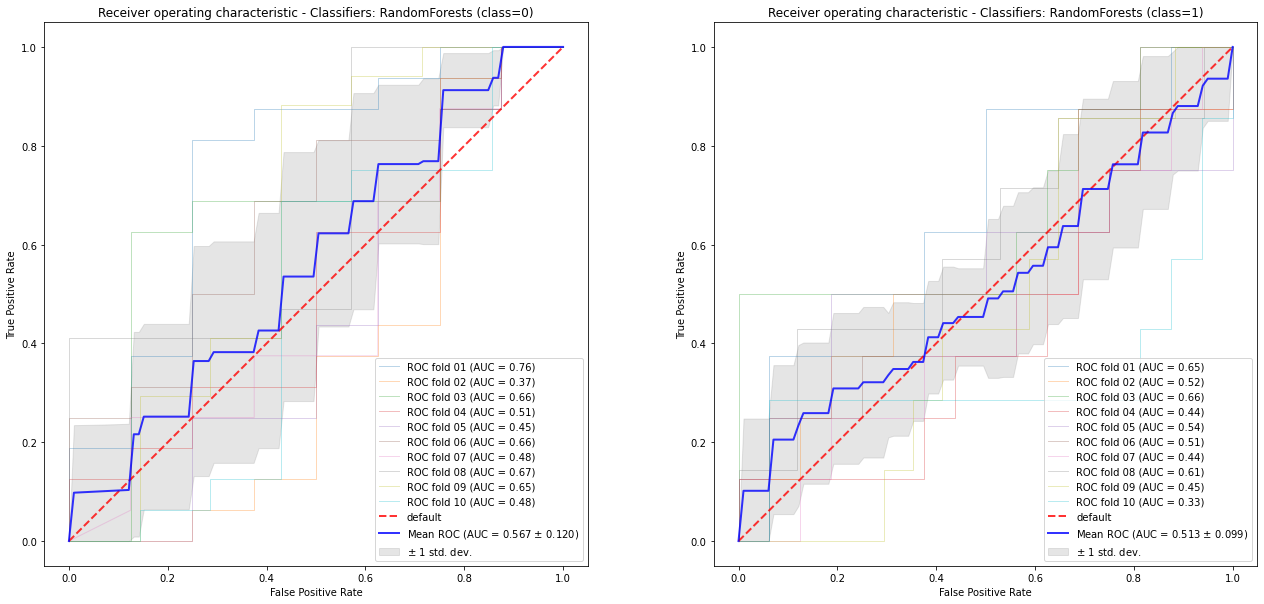

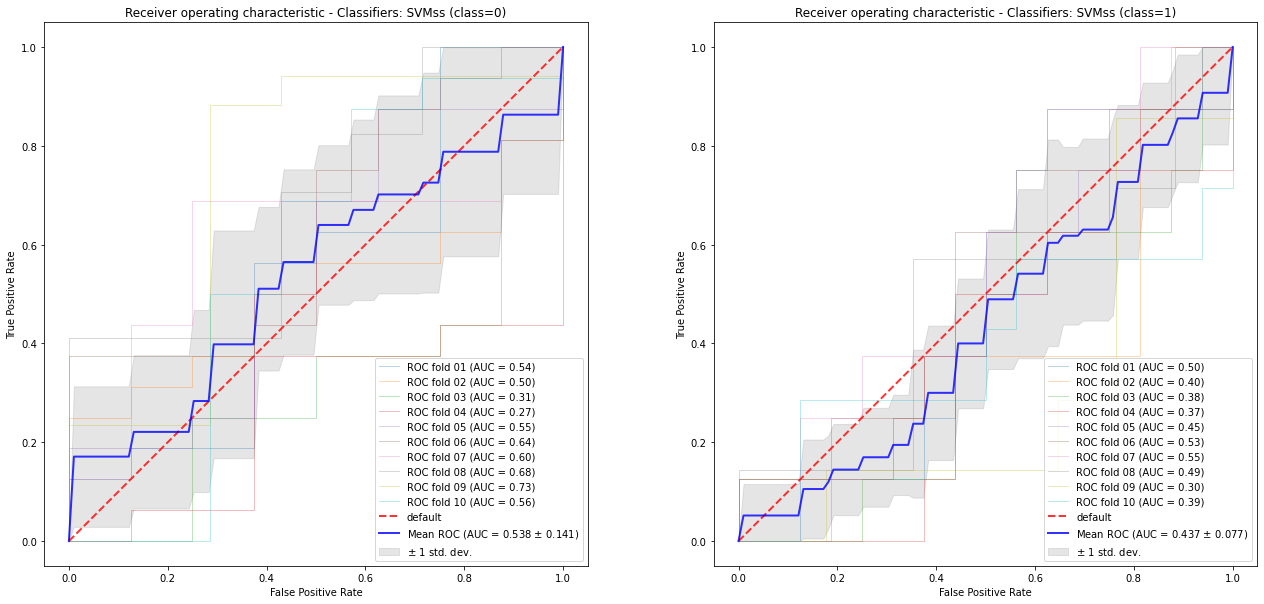

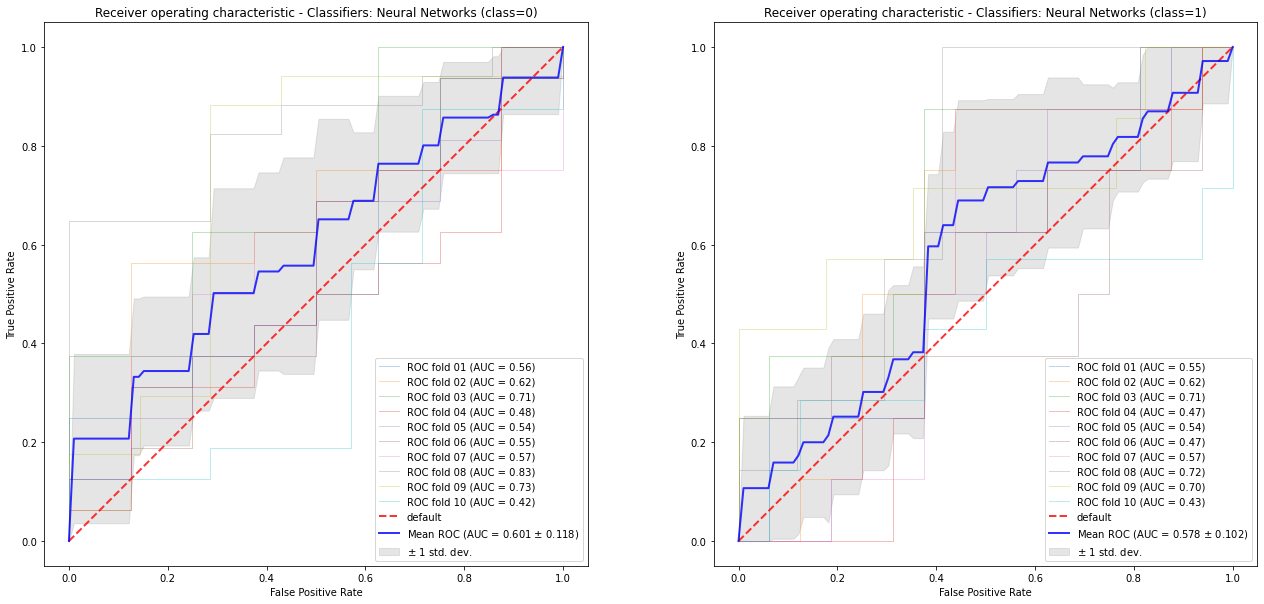

In [30]:
run_all(synthetic_data, training)

## Different Distribution truncnorm

In [34]:
custom_synthesizer1 = GaussianCopulaSynthesizer(metadata,
                                                default_distribution='truncnorm')

custom_synthesizer1.fit(training)

synthetic_data2 = custom_synthesizer1.sample(num_rows=239)

#'norm', 'beta', 'truncnorm', 'uniform', 'gamma', 'gaussian_kde'

RandomForest
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.8046875, 1: 0.8359375}
auc_gen {0: 0.4327632461435279, 1: 0.4511234071093226}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.6554621848739496, 1: 0.6638655462184874}
auc_gen {0: 0.4085345405767941, 1: 0.48507712944332665}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.6638655462184874, 1: 0.6470588235294118}
auc_gen {0: 0.39273138832997984, 1: 0.5081321260898726}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier

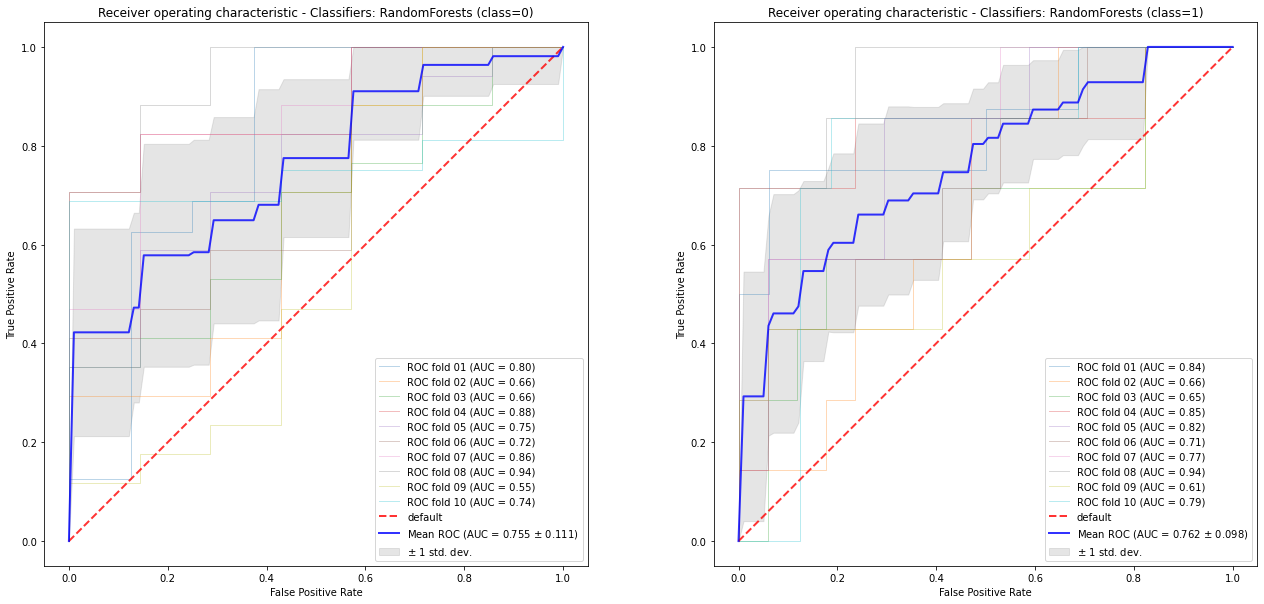

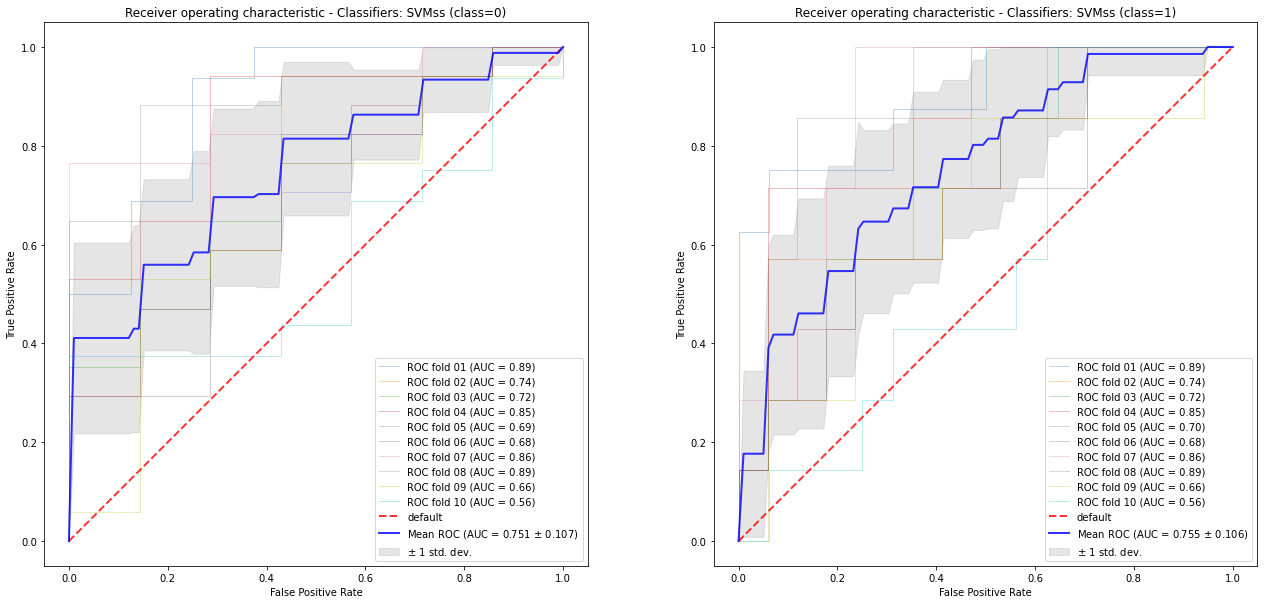

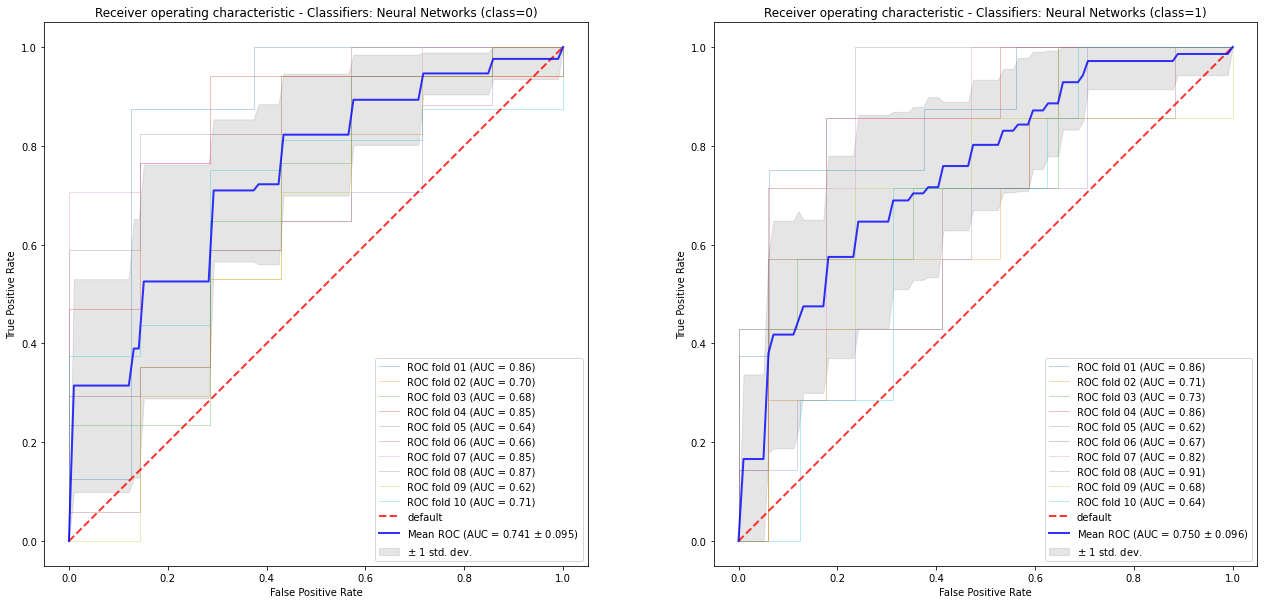

In [41]:
run_all(training, synthetic_data2)

## Different Distribution norm

RandomForest
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.8203125, 1: 0.7578125}
auc_gen {0: 0.5212105969148223, 1: 0.4735915492957746}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.7899159663865546, 1: 0.7478991596638656}
auc_gen {0: 0.4133970489604292, 1: 0.4185110663983903}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.680672268907563, 1: 0.73109243697479}
auc_gen {0: 0.4037139503688799, 1: 0.44701542588866533}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__es

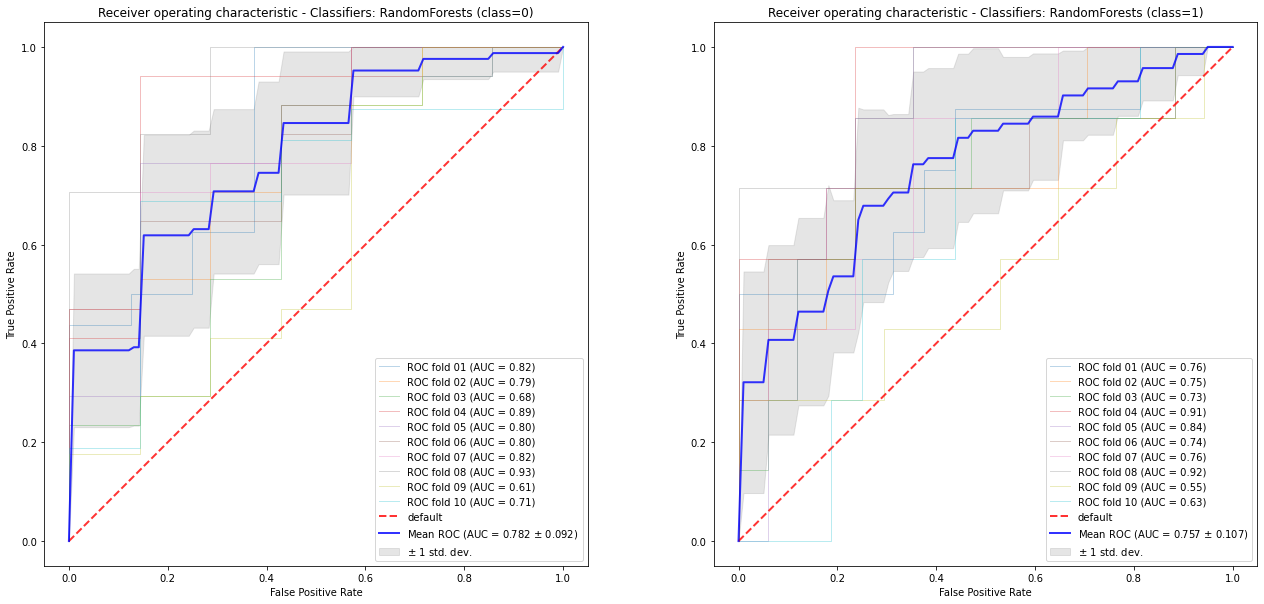

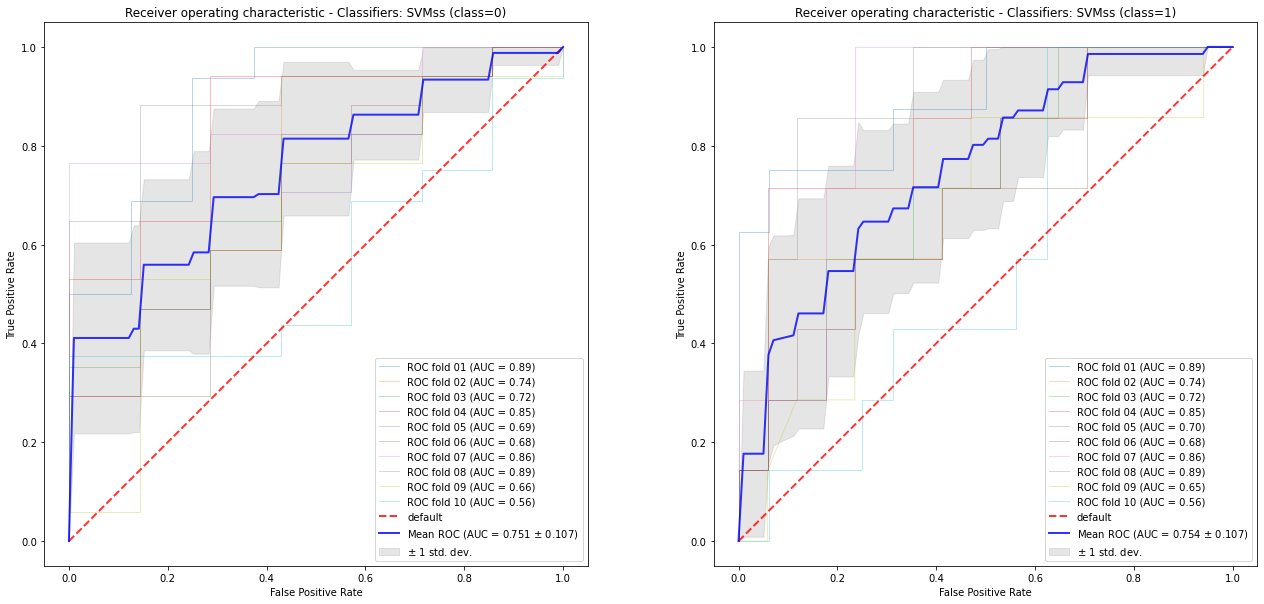

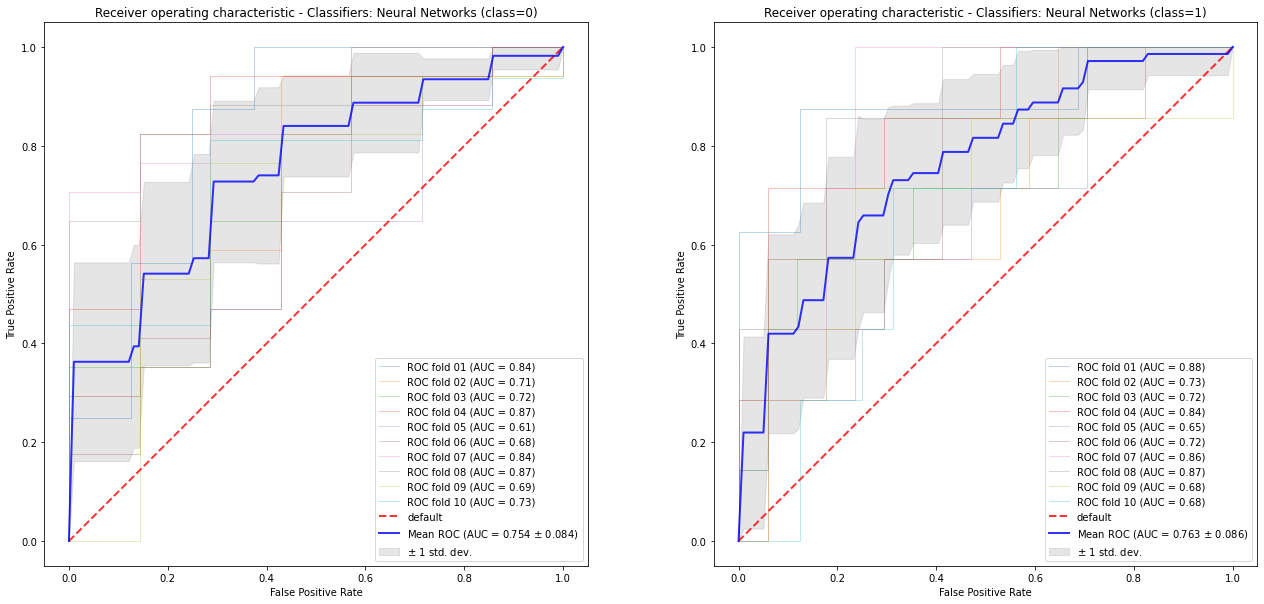

In [43]:
custom_synthesizer2 = GaussianCopulaSynthesizer(metadata,
                                                default_distribution='norm')

custom_synthesizer2.fit(training)

synthetic_data3 = custom_synthesizer1.sample(num_rows=239)
run_all(training, synthetic_data3)
#'norm', 'beta', 'truncnorm', 'uniform', 'gamma', 'gaussian_kde'

RandomForest
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.8125, 1: 0.75}
auc_gen {0: 0.42865526492287054, 1: 0.482771629778672}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.773109243697479, 1: 0.6890756302521008}
auc_gen {0: 0.4374580818242789, 1: 0.4164151576123407}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.7394957983193278, 1: 0.680672268907563}
auc_gen {0: 0.4135228034875922, 1: 0.45380617035546617}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator

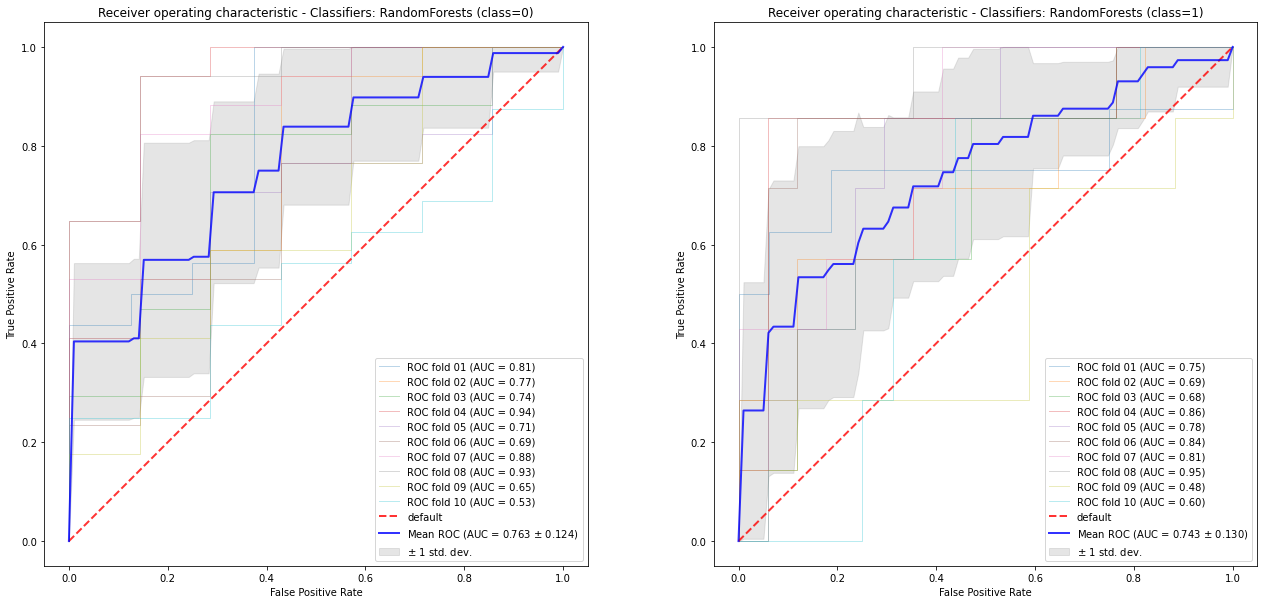

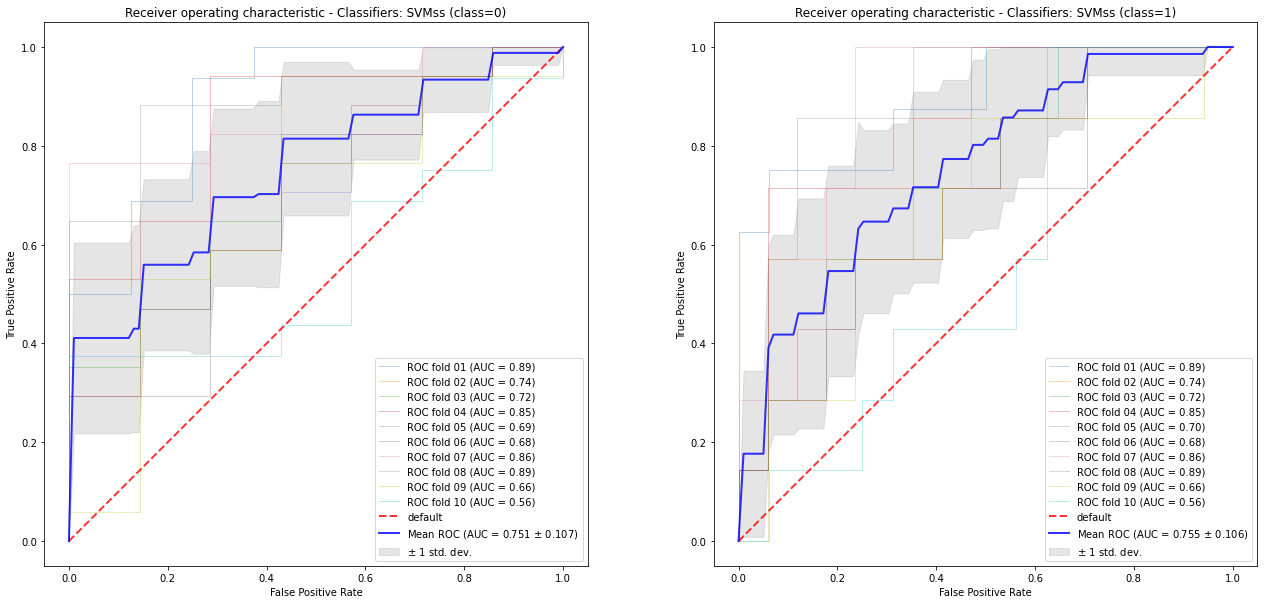

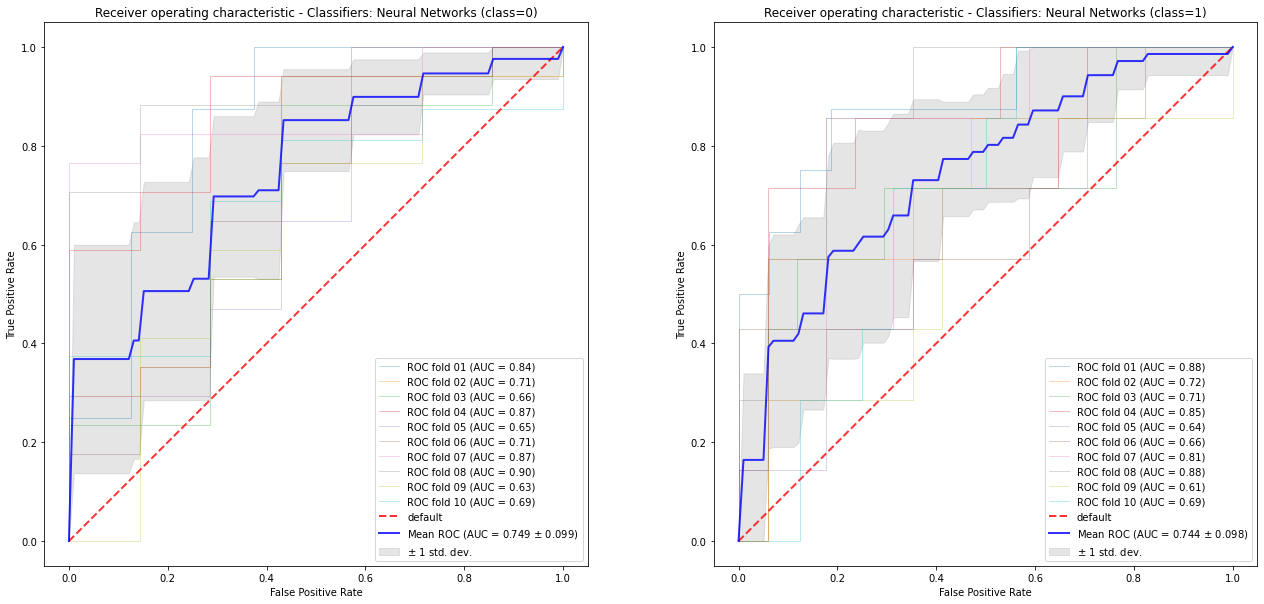

In [44]:
custom_synthesizer3 = GaussianCopulaSynthesizer(metadata,
                                                default_distribution='uniform')

custom_synthesizer3.fit(training)

synthetic_data4 = custom_synthesizer1.sample(num_rows=239)
run_all(training, synthetic_data3)
#'norm', 'beta', 'truncnorm', 'uniform', 'gamma', 'gaussian_kde'

RandomForest
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.7890625, 1: 0.88671875}
auc_gen {0: 0.42219986586183766, 1: 0.4393024815560026}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.7226890756302521, 1: 0.5588235294117647}
auc_gen {0: 0.494257209926224, 1: 0.4913229376257545}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.6638655462184874, 1: 0.8235294117647058}
auc_gen {0: 0.43661971830985913, 1: 0.45041079812206575}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifie

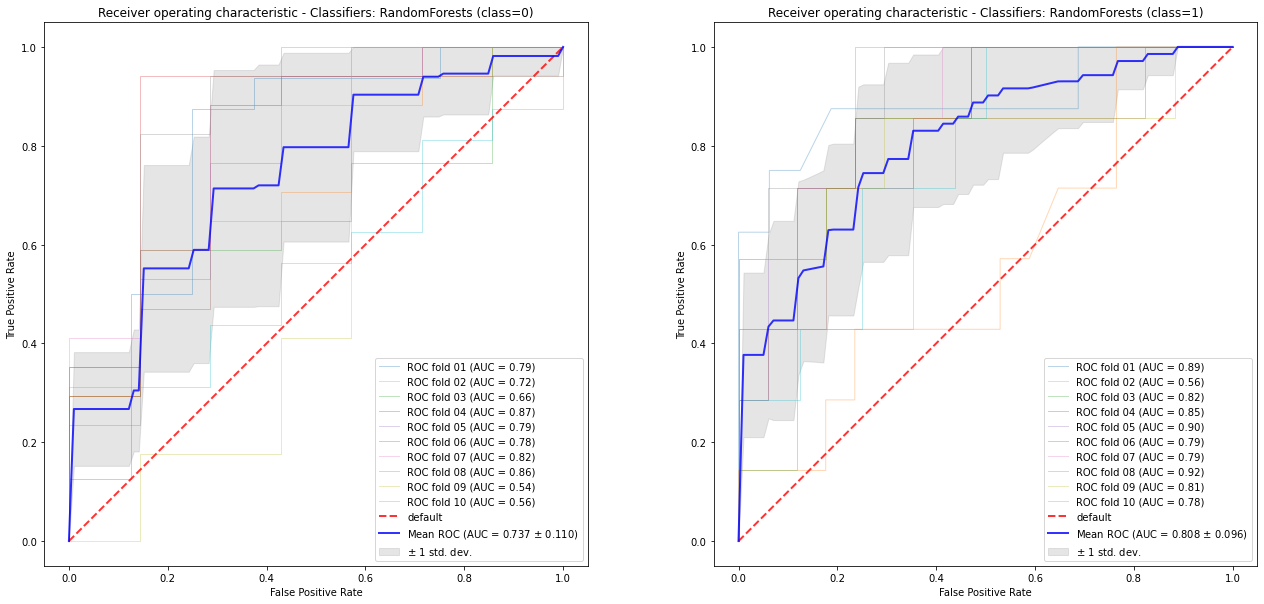

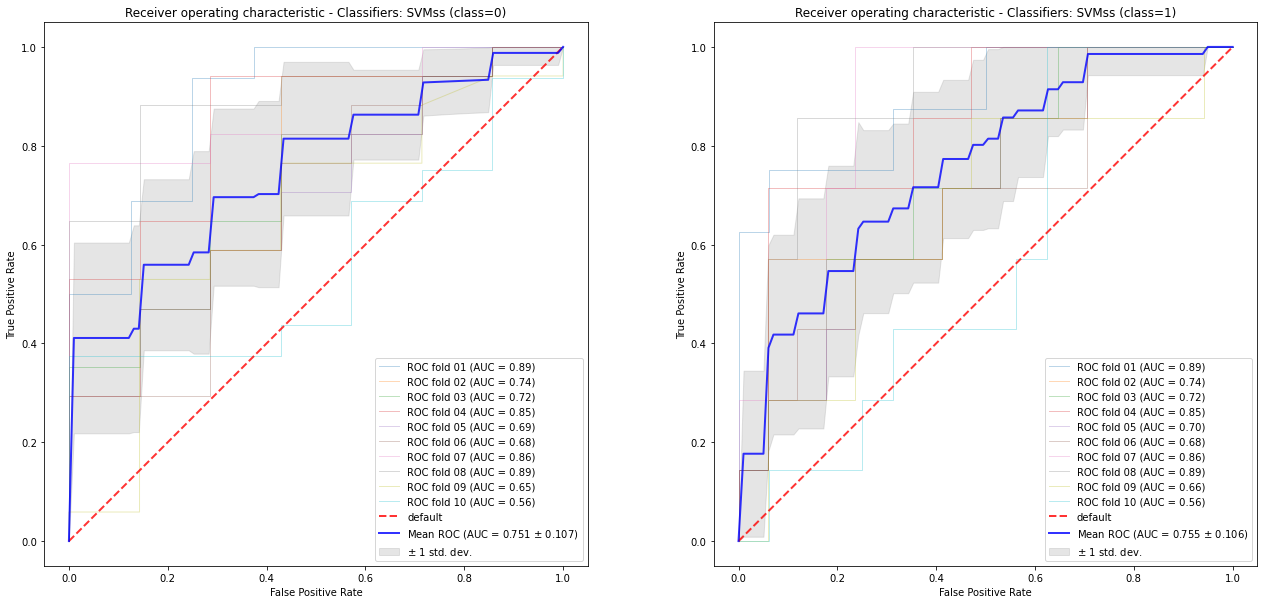

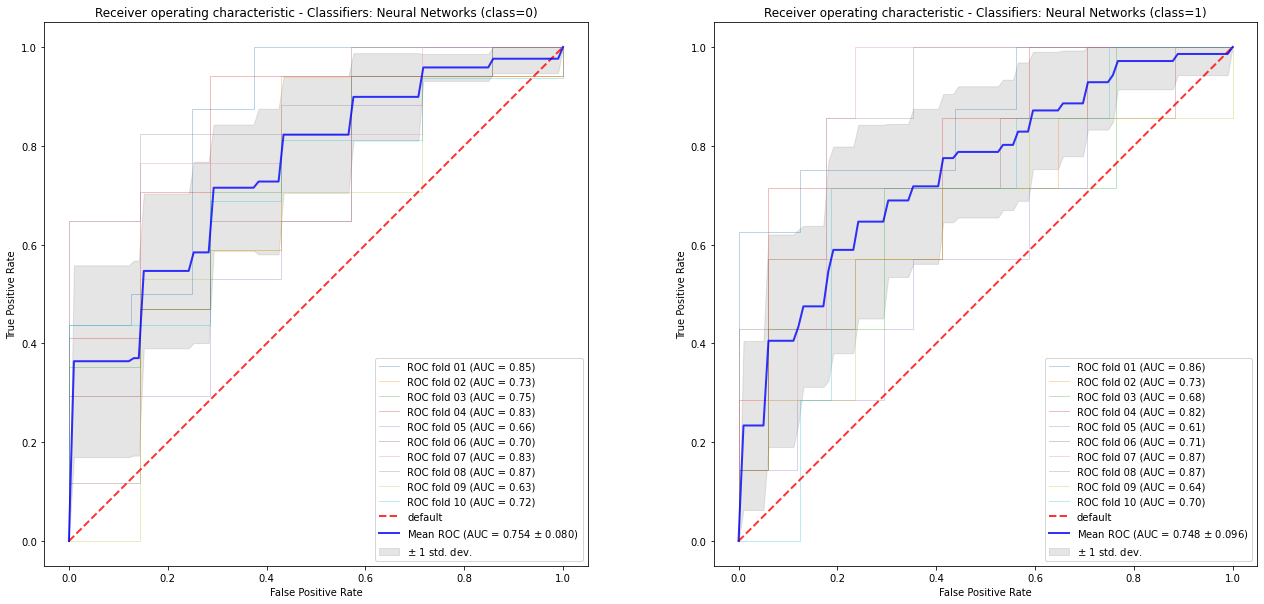

In [46]:
custom_synthesizer3 = GaussianCopulaSynthesizer(metadata,
                                                default_distribution='gamma')

custom_synthesizer3.fit(training)

synthetic_data4 = custom_synthesizer1.sample(num_rows=239)
run_all(training, synthetic_data4)
#'norm', 'beta', 'truncnorm', 'uniform', 'gamma', 'gaussian_kde'

RandomForest
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.8515625, 1: 0.78125}
auc_gen {0: 0.47908283031522475, 1: 0.3847250167672703}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.6722689075630253, 1: 0.7647058823529411}
auc_gen {0: 0.4235831656606304, 1: 0.46420187793427226}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 10}
auc {0: 0.7058823529411765, 1: 0.6638655462184874}
auc_gen {0: 0.4902330650570087, 1: 0.45497987927565386}
Best params : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 4, 'classifier_

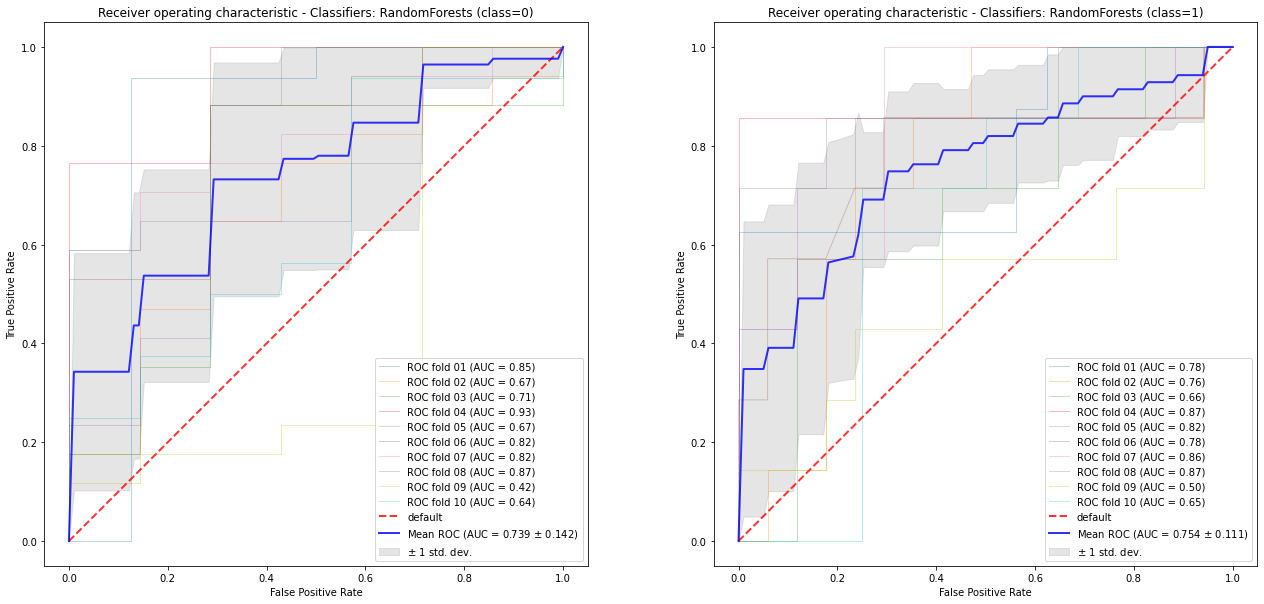

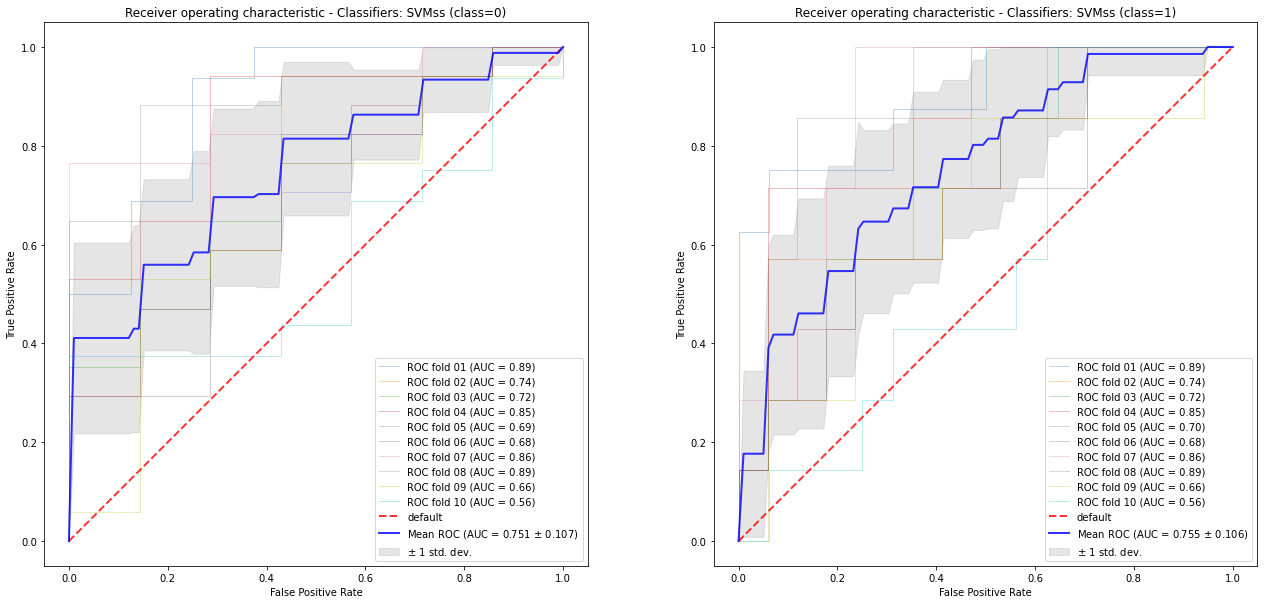

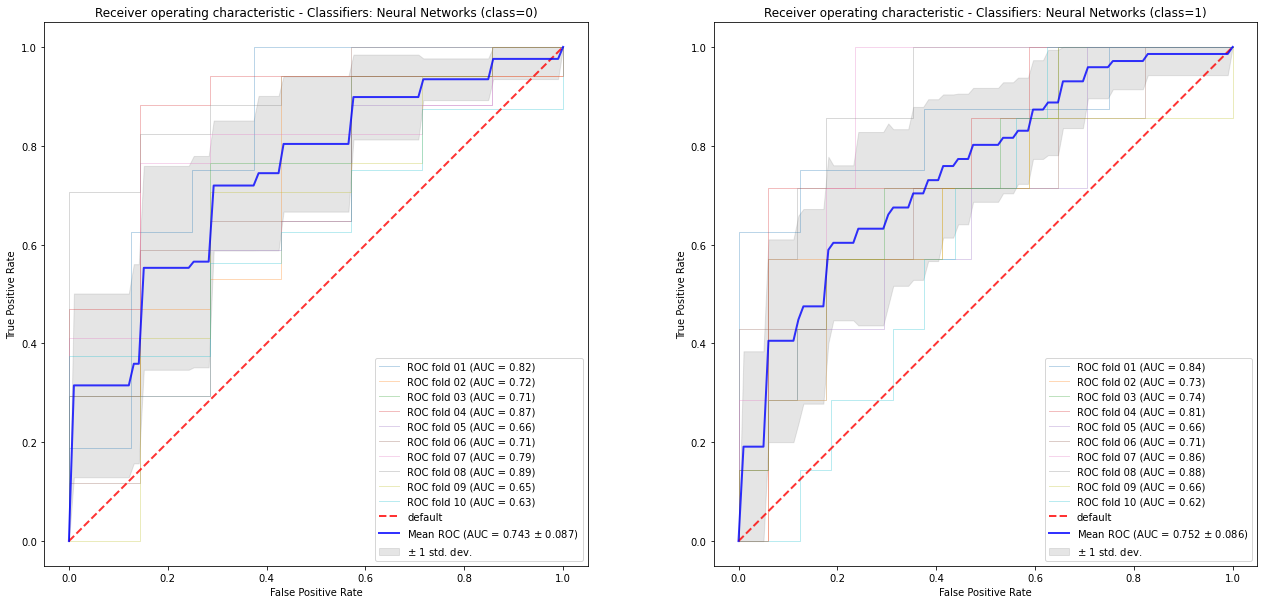

In [47]:
custom_synthesizer4 = GaussianCopulaSynthesizer(metadata,
                                                default_distribution='gaussian_kde')

custom_synthesizer4.fit(training)

synthetic_data5 = custom_synthesizer1.sample(num_rows=239)
run_all(training, synthetic_data5)
#'norm', 'beta', 'truncnorm', 'uniform', 'gamma', 'gaussian_kde'